# Summary of Series IDs:

| **Series ID**      | **Category**                            | **Area**           | **Adjustment**         | **Description**                                                 |
|--------------------|-----------------------------------------|--------------------|------------------------|-----------------------------------------------------------------|
| **CUUR0000SEEEC**   | Information Technology Commodities      | U.S. city average  | Not seasonally adjusted | Tracks prices of tech products like PCs, peripherals, etc.       |
| **CUURS000SAEC**    | Education and Communication Commodities | South urban region | Seasonally adjusted     | Tracks prices of educational materials (e.g., books, supplies) and communication devices (e.g., phones, computers) |
| **CUURS000SAES**    | Education and Communication Services    | South urban region | Seasonally adjusted     | Tracks prices of services like internet and education            |
| **CUUS0000SEEE**    | Information Technology Hardware & Services | U.S. city average  | Not seasonally adjusted | Tracks prices of IT hardware and services                        |


### Consumer Price Index (CPI) Explanation

The **Consumer Price Index (CPI)** is a measure that examines the average change over time in the prices paid by consumers for a basket of goods and services. The CPI is used to assess price changes associated with the cost of living, making it a crucial indicator of inflation and deflation.

- **CPI Value**: Represents the price level of a predetermined basket of goods and services relative to a base period. 
  - For example, if the **CPI value** is **250**, this means that prices have increased by **150%** compared to the base period (typically 1982-1984).
  
- **Uses of CPI**:
  - **Tracking Inflation**: CPI is widely used to track inflation rates and understand purchasing power trends.
  - **Cost-of-Living Adjustments**: Many contracts, pensions, and wages are adjusted based on changes in the CPI.
  - **Economic Policy**: Governments and central banks monitor CPI to set monetary policy, such as interest rates.

In this dataset, the CPI is specific to various categories such as **Information Technology Commodities** and **Services**, allowing for detailed insights into price trends within the tech sector.


In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('../Resources/CPI_Tech2018-2024.csv')

# Check the first few rows of the data to understand its structure
print(df.head())

       Series ID  Year Period     Label   Value
0  CUUR0000SEEEC  2018    M01  2018 Jan  56.343
1  CUUR0000SEEEC  2018    M02  2018 Feb  56.001
2  CUUR0000SEEEC  2018    M03  2018 Mar  55.699
3  CUUR0000SEEEC  2018    M04  2018 Apr  55.804
4  CUUR0000SEEEC  2018    M05  2018 May  55.537


In [2]:
# Convert 'Year' and 'Period' into a proper datetime format
df['Month'] = df['Period'].apply(lambda x: x[1:])  # Extract the month part from 'Period'
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))  # Create a 'Date' column

# Drop the now redundant 'Year', 'Period', and 'Label' columns
df = df.drop(columns=['Year', 'Period', 'Label'])

# Set 'Date' as the index (optional for time series analysis)
df.set_index('Date', inplace=True)

# Check the first few rows to verify changes
print(df.head())


                Series ID   Value Month
Date                                   
2018-01-01  CUUR0000SEEEC  56.343    01
2018-02-01  CUUR0000SEEEC  56.001    02
2018-03-01  CUUR0000SEEEC  55.699    03
2018-04-01  CUUR0000SEEEC  55.804    04
2018-05-01  CUUR0000SEEEC  55.537    05


In [3]:
# Drop the 'Month' column, since 'Date' already contains both year and month
df = df.drop(columns=['Month'])

# Check the first few rows to verify the final structure
print(df.head())


                Series ID   Value
Date                             
2018-01-01  CUUR0000SEEEC  56.343
2018-02-01  CUUR0000SEEEC  56.001
2018-03-01  CUUR0000SEEEC  55.699
2018-04-01  CUUR0000SEEEC  55.804
2018-05-01  CUUR0000SEEEC  55.537


In [4]:
# Filter for each commodity using Series ID
it_commodities_df = df[df['Series ID'] == 'CUUR0000SEEEC'].copy()  # Use .copy() to avoid warnings
it_hardware_services_df = df[df['Series ID'] == 'CUUS0000SEEE'].copy()
edu_comm_commodities_df = df[df['Series ID'] == 'CUURS000SAEC'].copy()
edu_comm_services_df = df[df['Series ID'] == 'CUURS000SAES'].copy()

# Calculate the month-over-month inflation rate for each commodity using .loc
it_commodities_df.loc[:, 'Inflation Rate'] = it_commodities_df['Value'].pct_change() * 100
it_hardware_services_df.loc[:, 'Inflation Rate'] = it_hardware_services_df['Value'].pct_change() * 100
edu_comm_commodities_df.loc[:, 'Inflation Rate'] = edu_comm_commodities_df['Value'].pct_change() * 100
edu_comm_services_df.loc[:, 'Inflation Rate'] = edu_comm_services_df['Value'].pct_change() * 100

# Check the first few rows for one of the dataframes to verify the inflation rate is added
print(it_commodities_df.head())


                Series ID   Value  Inflation Rate
Date                                             
2018-01-01  CUUR0000SEEEC  56.343             NaN
2018-02-01  CUUR0000SEEEC  56.001       -0.606996
2018-03-01  CUUR0000SEEEC  55.699       -0.539276
2018-04-01  CUUR0000SEEEC  55.804        0.188513
2018-05-01  CUUR0000SEEEC  55.537       -0.478460


In [5]:
# Fill NaN values with 0
it_commodities_df['Inflation Rate'].fillna(0, inplace=True)


In [6]:
import matplotlib.pyplot as plt

# Define a function to plot both CPI and Inflation Rate for each commodity
def plot_cpi_inflation(df, title):
    plt.figure(figsize=(10, 6))
    
    # Plot CPI
    plt.subplot(2, 1, 1)  # Two plots, 1st position
    plt.plot(df.index, df['Value'], label=f'CPI - {title}')
    plt.title(f'CPI Over Time - {title}')
    plt.xlabel('Date')
    plt.ylabel('CPI Value')
    plt.legend()
    
    # Plot Inflation Rate
    plt.subplot(2, 1, 2)  # Two plots, 2nd position
    plt.plot(df.index, df['Inflation Rate'], label=f'Inflation Rate - {title}', color='orange')
    plt.title(f'Inflation Rate Over Time - {title}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


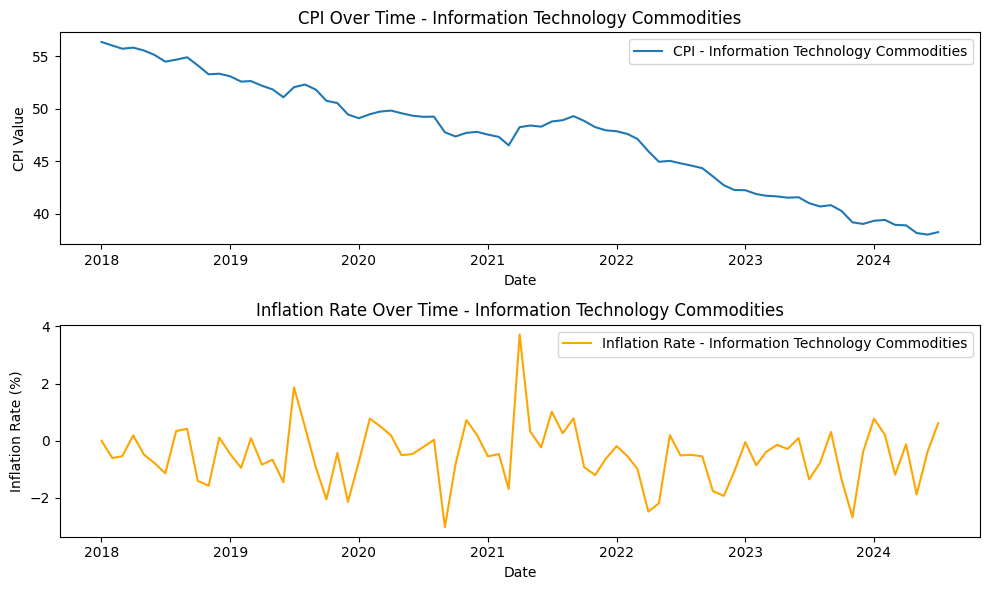

In [7]:
# Plot for Information Technology Commodities
plot_cpi_inflation(it_commodities_df, 'Information Technology Commodities')

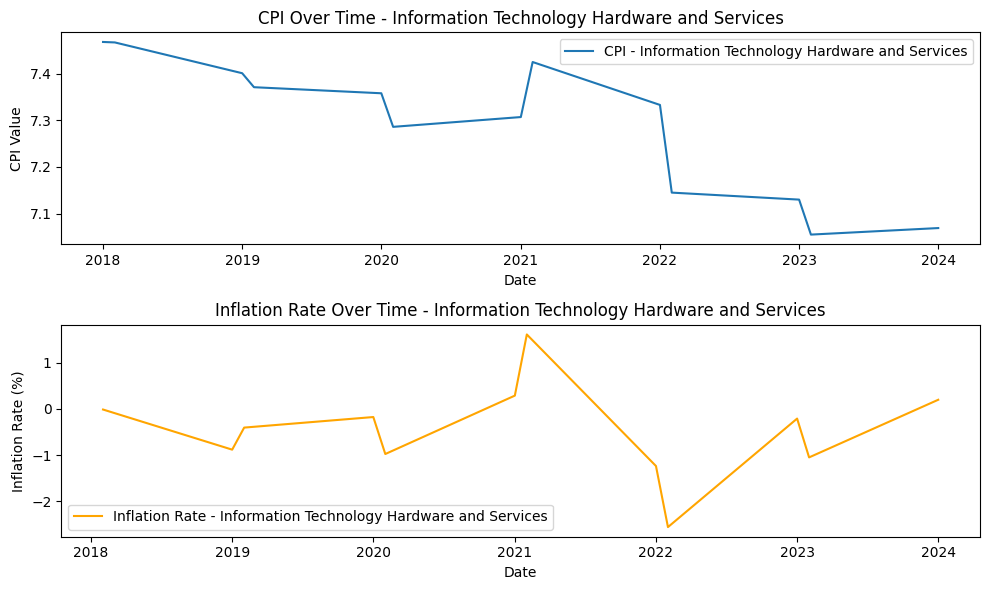

In [8]:
# Plot for Information Technology Hardware and Services
plot_cpi_inflation(it_hardware_services_df, 'Information Technology Hardware and Services')

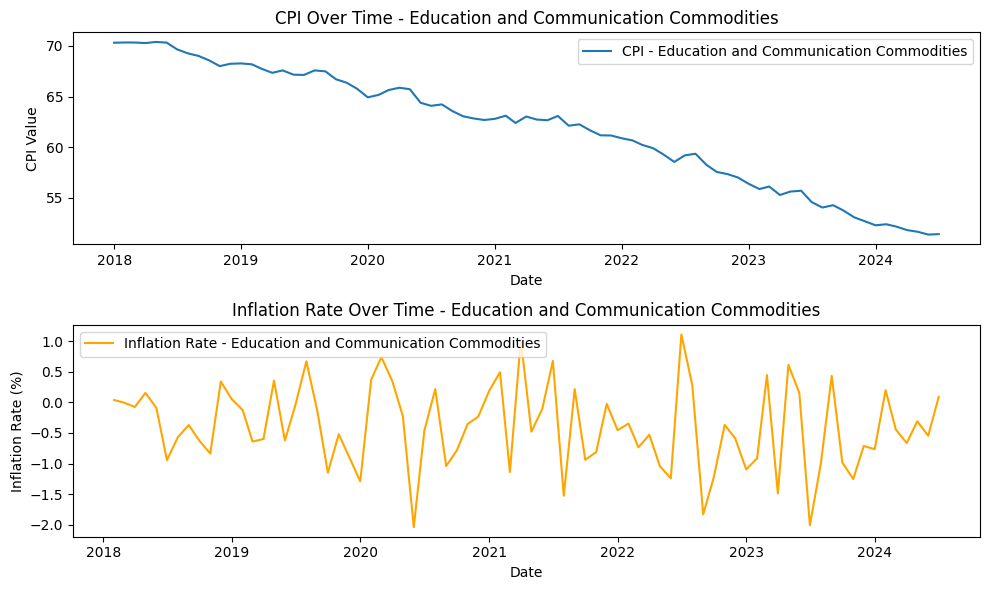

In [9]:
# Plot for Education and Communication Commodities
plot_cpi_inflation(edu_comm_commodities_df, 'Education and Communication Commodities')


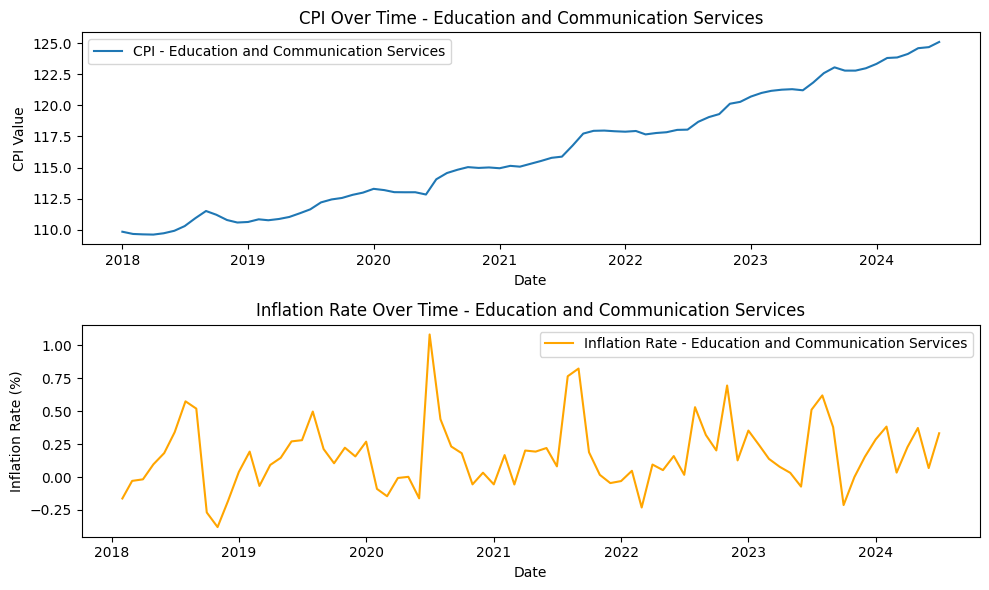

In [10]:
# Plot for Education and Communication Services
plot_cpi_inflation(edu_comm_services_df, 'Education and Communication Services')

In [12]:
# Add a column to identify each commodity category
it_commodities_df['Commodity'] = 'Information Technology Commodities'
it_hardware_services_df['Commodity'] = 'Information Technology Hardware & Services'
edu_comm_commodities_df['Commodity'] = 'Education and Communication Commodities'
edu_comm_services_df['Commodity'] = 'Education and Communication Services'

# Combine all the DataFrames into one
combined_df = pd.concat([it_commodities_df, it_hardware_services_df, edu_comm_commodities_df, edu_comm_services_df])

# Convert the Date index to YYYY-MM format using PeriodIndex
combined_df.index = combined_df.index.to_period('M')  # This ensures the Date is in YYYY-MM format

# Clean up the combined DataFrame
combined_df = combined_df[['Series ID', 'Value', 'Inflation Rate', 'Commodity']]

# Fill missing Inflation Rate values with 0
combined_df['Inflation Rate'].fillna(0, inplace=True)

combined_df.head(10)


,Series ID,Value,Inflation Rate,Commodity
Date,,,,
2018-01,CUUR0000SEEEC,56.343,0.000000,Information Technology Commodities
2018-02,CUUR0000SEEEC,56.001,-0.606996,Information Technology Commodities
2018-03,CUUR0000SEEEC,55.699,-0.539276,Information Technology Commodities
2018-04,CUUR0000SEEEC,55.804,0.188513,Information Technology Commodities
2018-05,CUUR0000SEEEC,55.537,-0.478460,Information Technology Commodities
2018-06,CUUR0000SEEEC,55.099,-0.788663,Information Technology Commodities
2018-07,CUUR0000SEEEC,54.472,-1.137952,Information Technology Commodities
2018-08,CUUR0000SEEEC,54.659,0.343296,Information Technology Commodities
2018-09,CUUR0000SEEEC,54.887,0.417132,Information Technology Commodities


In [13]:
import os

# Step 1: Create the 'Dataframes' folder if it doesn't exist
folder_path = 'Dataframes'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder created: {folder_path}")
else:
    print(f"Folder already exists: {folder_path}")

# Step 2: Define the CSV file path
csv_path = os.path.join(folder_path, 'combined_cpi_data.csv')

# Step 3: Save the combined DataFrame as a CSV file
combined_df.to_csv(csv_path, index=True)
print(f"DataFrame saved as CSV at {csv_path}")


Folder already exists: Dataframes
DataFrame saved as CSV at Dataframes\combined_cpi_data.csv
